# Definiciones básicas de probabilidad

**Definición.** Sea $\Omega$ un conjunto (espacio muestral). Una función $\mathbb{P}$ que manda subconjuntos $A \subseteq \Omega$ (sucesos) en números reales positivos $\mathbb{P}(A) \geq 0$ se dice una *probabilidad* si:
* (Normalización) Se tiene $\mathbb{P}(\Omega)=1$ y $\mathbb{P}(\emptyset)=0$.
* (Aditividad) Si $A, B \subseteq \Omega$ son disjuntos, entonces $\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B)$.

El par $(\Omega, \mathbb{P})$ se llama un *espacio de probabilidad*.

**Observación.**
* $\mathbb{P}(A^c) = 1 - \mathbb{P}(A)$. *Demostración:* $\mathbb{P}(A) + \mathbb{P}(A^c)= \mathbb{P}(A \cup A^c) = \mathbb{P}(\Omega)=1$.
* Si $A \subseteq B$ entonces $\mathbb{P}(A) \leq \mathbb{P}(B)$. *Demostración:* $\mathbb{P}(B) = \mathbb{P}(A) + \mathbb{P}(B-A) \geq \mathbb{P}(A)$.

**Ejemplo.**
* Tomamos $\Omega = \left\{a,b,c\right\}$ y hacemos
$$
    \mathbb{P}(\emptyset)=0 \hspace{0.5cm} \mathbb{P}(\left\{a\right\}) = 0.2 \hspace{0.5cm} \mathbb{P}(\left\{b\right\}) = 0.3 \hspace{0.5cm}     \mathbb{P}(\left\{c\right\}) = 0.5
$$
$$
    \mathbb{P}(\left\{a,b\right\}) = 0.5 \hspace{0.5cm} \mathbb{P}(\left\{a,c\right\}) = 0.7 \hspace{0.5cm}     \mathbb{P}(\left\{b,c\right\}) = 0.8 \hspace{0.5cm} \mathbb{P}(\left\{a,b, c\right\}) = 1
$$
* Tomamos $\Omega = \left\{\textrm{cara}, \textrm{cruz}\right\}$ y hacemos
$$
    \mathbb{P}(\textrm{cara}) = 0.3 \hspace{0.5cm}     \mathbb{P}(\textrm{cruz}) = 0.8
$$

* En general, si $\Omega$ es un conjunto finito, una probabilidad viene determinada por los valores $\mathbb{P}(x)$ para $x \in \Omega$ tales que $\sum_{x \in \Omega} \mathbb{P}(x) = 1$ (probabilidad discreta).

* Regla de Laplace: Si todos los sucesos unipuntuales son igual de probables $\mathbb{P}(A) = \frac{\textrm{éxitos}}{\textrm{totales}}$.

**Ejercicio.**
* ¿Cuál es la probabilidad de sacar un rey en una baraja de cartas española?.

In [0]:
# BIBLIOTECAS USADAS DURANTE TODA LA PÁGINA
from random import *
from math import *
import numpy as np
import scipy.stats as stats
import scipy.special
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [0]:
# APLICA LA REGLA DE LAPLACE AL
# EXPERIMENTO SUMINISTRADO

def experimentar(experimento, intentos = 100000):
    exitos = 0
    for i in range(intentos):
        if experimento():
            exitos = exitos + 1
    return exitos/intentos

In [0]:
def sacar_carta(n_cartas):
    carta = randint(1, n_cartas)
    if carta > n_cartas-4:
        return True
    return False

print("Resultado teorico: %s"%(4/40))
print("Resultado experimental: %s"%experimentar(lambda:sacar_carta(40)))

Resultado teorico: 0.1
Resultado experimental: 0.0993


* ¿Cuál es la probabilidad de que, al tirar tres monedas, se obtenga al menos una cara y una cruz?

In [0]:
def tirar_tres_monedas():
    # primera moneda
    if random() > 0.3:
        moneda1 = True
    else:
        moneda1 = False
    
    # segunda moneda
    if random() > 0.3:
        moneda2 = True
    else:
        moneda2 = False
    
    # tercera moneda
    if random() > 0.3:
        moneda3 = True
    else:
        moneda3 = False
    
    return moneda1, moneda2, moneda3

def comprobar():
    moneda1, moneda2, moneda3 = tirar_tres_monedas()
    
    if any([moneda1 == True, moneda2 == True, moneda3== True]): # Alguna moneda es cara
        if any([moneda1== False, moneda2==False, moneda3==False]): # Y alguna moneda es cruz
            return True
    
    return False


print("Resultado teorico: %s"%(1-0.3**3-(1-0.3)**3))
print("Resultado experimental: %s"%experimentar(comprobar))

Resultado teorico: 0.6300000000000001
Resultado experimental: 0.62924


* ¿Cuál es la probabilidad de que salgan 2 caras al tirar 3 monedas? ¿Y 3 caras en 5 monedas?.

In [0]:
def tirar_monedas(n_monedas):
    caras = 0
    return sum([randint(0,1) for i in range(n_monedas)])

def experimento(n_caras, n_monedas):
    return tirar_monedas(n_monedas) == n_caras

print('2 caras en 3 monedas: %s / %s'%(experimentar(lambda: experimento(2,3)), scipy.special.binom(3,2)*0.5**3))
print('3 caras en 5 monedas: %s / %s'%(experimentar(lambda: experimento(3,5)), scipy.special.binom(5,3)*0.5**5))

2 caras en 3 monedas: 0.37396 / 0.375
3 caras en 5 monedas: 0.30982 / 0.3125


* Si sacamos dos cartas de una baraja española sin reemplazo, ¿cuál es la probabilidad de sacar dos reyes?. Difícil!

In [0]:
def experimento():
    carta1 = randint(1, 40)
    carta2 = randint(1, 39)
    if carta1 > 40-4 and carta2 > 39-3:
        return True
    return False

print(experimentar(experimento))

0.00748


## Dependencia e independencia

**Definición.** Dos sucesos $A, B \subseteq \Omega$ se dicen *independientes* si
$$
 \mathbb{P}(A \cap B) = \mathbb{P}(A) \cdot \mathbb{P}(B).
$$

**Ejemplo.** $\Omega = \left\{\textrm{cara o cruz en dos monedas}\right\}$. $A =$ Sacar cara en la primera moneda y $B=$ Sacar cara en la segunda moneda. Entonces $\mathbb{P}(A)=\mathbb{P}(B)=0.5$ y $\mathbb{P}(A \cap B)=\mathbb{P}(\textrm{Dos caras}) = 0.25 = 0.5\cdot 0.5$.

**Definición.** Dados dos sucesos $A, B \subseteq \Omega$, la *probabilidad condicionada* de $A$ dado $B$ es
$$
    \mathbb{P}(A\,|\,B)=\frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}.
$$

**Observación.** Si $A$ y $B$ son independientes, entonces $\mathbb{P}(A\,|\,B)=\mathbb{P}(A)$.

**Ejercicio.** Probabilidad de sacar dos reyes sin reemplazo.
$$
    \mathbb{P}(R_1 \cap R_2) =  \mathbb{P}(R_2\,|\, R_1) \mathbb{P}(R_1) = \frac{7}{49}\frac{8}{50} \approx 0.0077
$$

**Proposición (regla de la probabilidad total)** Supongamos que descomponemos $\Omega = B_1 \cup B_2 \cup \ldots B_n$ con los $B_n$ disjuntos. Entonces, para todo suceso $A$
$$
    \mathbb{P}(A) = \sum_{i=1}^n \mathbb{P}(A\,|\,B_i)\mathbb{P}(B_i)
$$

**Ejercicio.** Probabilidad que la segunda carta sea un rey.
$$
    \mathbb{P}(R_1 \cap R_2) =  \mathbb{P}(R_2\,|\, R_1) \mathbb{P}(R_1) +\mathbb{P}(R_2\,|\, R_1^c) \mathbb{P}(R_1^c) = \frac{3}{39}\frac{4}{40} + \frac{4}{39}\frac{36}{40} = 0.1
$$

In [0]:
def experimento():
    carta1 = randint(1, 40)
    carta2 = randint(1, 39)
    if carta1 > 40-4 and carta2 > 39-3:
        return True
    if carta1 <= 40-4 and carta2 > 39-4:
        return True
    
    return False

print(experimentar(experimento))

0.10209


**Ejercicio.** Se tiene una urna con 3 bolas rojas y 4 bolas azules. ¿Cuál es la probabilidad de extraer dos bolas rojas? ¿Cuál es la probabilidad de que la segunda bola sea roja? ¿Cuál es la probabilidad de sacar una bola roja y una azul?

## Regla de Bayes

**Proposición (regla de Bayes).** Para todo suceso $A$ y $B$, se tiene
$$
    \mathbb{P}(B\,|\,A)=\frac{\mathbb{P}(A\,|\,B)\,\mathbb{P}(B)}{\mathbb{P}(A)}.
$$
*Demostración.* Usando la definición, se tiene
$$
    \mathbb{P}(B\,|\,A)\,\mathbb{P}(A)=\mathbb{P}(A \cap B) = \mathbb{P}(A\,|\,B)\,\mathbb{P}(B).
$$

**Ejercicio.** Una enfermedad tiene una prevalencia del 5%. Se ha diseñado un test que tiene un 2% de falsos negativo y un 1% de falsos positivo. Si sabemos que el test es positivo, ¿qué probabilidad hay de que sufra la enfermedad?

*Solución.*
Denotemos $E = $ Sufrir la enfermedad y $T = $ El test ha dado positivo. Los falsos negativo son $\mathbb{P}(T^c\,|\,E) = 0.02$ y los falsos positivo son $\mathbb{P}(T\,|\,E^c) = 0.01$. Con estos datos, calculamos $\mathbb{P}(T\,|\,E) = 1-0.02=0.98$.

Quéremos calcular $\mathbb{P}(E\,|\,T)$. Para ello, usamos la regla de Bayes para obtener

$$
    \mathbb{P}(E\,|\,T) = \frac{\mathbb{P}(T\,|\,E) \mathbb{P}(E)}{\mathbb{P}(T)} = \frac{\mathbb{P}(T\,|\,E) \mathbb{P}(E)}{\mathbb{P}(T\,|\,E)\mathbb{P}(E) + \mathbb{P}(T\,|\,E^c)\mathbb{P}(E^c)} = \frac{0.98\cdot 0.05}{0.98\cdot 0.05 + 0.01 \cdot 0.95} \approx 0.84
$$

**Ejercicio.** En un jardín, hay que regar el cesped. El cesped solo puede estar mojado bien porque llueva o porque se conecten los aspersores. Se sabe que hay un 20% de probabilidades de lluvia. Los días que no llueve, se conectan los aspersores un 40% de las veces, pero si llueve, sólo se conectan un 1% de las veces. Si llueve y los aspersores están conectados, el cesped estará mojado con un 99% de probabilidad. Si solo están conectados los aspersores, la probabilidad baja a un 90% y, si solo llueve, baja aún más a 80%. Si sabemos que el suelo está mojado, ¿qué probabilidad hay de que haya llovido?

*Solución.* Denotemos $M =$ Cesped mojado, $L =$ Ha llovido y $A =$ Se han activado los aspersores. Calculamos, en primer lugar, las siguientes cantidades
$$
\mathbb{P}(M\,|\,L) = \mathbb{P}(M\,|\,L,A)\mathbb{P}(A\,|\,L) + \mathbb{P}(M\,|\,L,A^c)\mathbb{P}(A^c\,|\,L) \approx 0.80
$$

$$
\mathbb{P}(M) = \mathbb{P}(M\,|\,L,A)\mathbb{P}(A\,|\,L)\mathbb{P}(L) +  \mathbb{P}(M\,|\,L^c,A)\mathbb{P}(A\,|\,L^c)\mathbb{P}(L^c) +  \mathbb{P}(M\,|\,L,A^c)\mathbb{P}(A^c\,|\,L)\mathbb{P}(L) +  \mathbb{P}(M\,|\,L^c,A^c)\mathbb{P}(A^c\,|\,L^c)\mathbb{P}(L^c) \approx 0.45
$$

De este modo, tenemos
$$
\mathbb{P}(L\,|\,M) = \frac{\mathbb{P}(M\,|\,L)\mathbb{P}(L)}{\mathbb{P}(M)} \approx 0.356
$$

In [0]:
# GENERA LAS CONDICIONES DE
# UN DÍA ALEATORIO CON LAS
# PROBABILIDADES INDICADAS
def obtener_dia():
    if random() > 0.8:
        lluvia = True
        if random() > 0.01:
            aspersores = False
            if random() > 0.2:
                mojado = True
            else:
                mojado = False
        else:
            aspersores = True
            if random() > 0.01:
                mojado = True
            else:
                mojado = False
    else:
        lluvia = False
        if random() > 0.4:
            aspersores = False
            mojado = False
        else:
            aspersores = True
            if random() > 0.1:
                mojado = True
            else:
                mojado = False
                
                
    return lluvia, aspersores, mojado

# APLICA LA REGLA DE LAPLACE AL
# EXPERIMENTO CONDICIONAL SUMINISTRADO
def experimentar_condicional(experimento, max_intentos = 100000):
    exitos = 0
    intentos = 0
    for i in range(max_intentos):
        exito, valido = experimento()
        if valido:
            intentos = intentos + 1
        if exito:
            exitos = exitos + 1
    return exitos/intentos

def experimento():
    lluvia, aspersores, mojado = obtener_dia()
    if mojado:
        valido = True
    else:
        valido = False
    
    if valido and lluvia:
        exito = True
    else:
        exito = False
        
    return exito, valido

print(experimentar_condicional(experimento))

0.35879075387679293


### Clasificador Naïve Bayes

Usando la regla de Bayes, es posible dar un clasificador muy sencillo que permite obtener unos resultados razonables de forma rápida.

Supongamos que tenemos un conjunto de datos $x_1, \ldots, x_N$, cada uno de los cuales consta de $d$ atributos $x_i=(x_i^1, \ldots, x_i^d) \in \mathbb{R}^d$. Además, tenemos un número finito de clases y cada uno de los datos pertenece a alguna de esas clases, digamos clases $c_1, \ldots, c_N$.

Entonces, si nos llega un nuevo dato $x = (x^1, \ldots, x^d)$ y queremos estimar su clase, podemos calcular, para cada posible clase $c$, la probabilidad

$$
    \mathbb{P}\left(c \,|\, x^1, \ldots, x^d\right) = \frac{\mathbb{P}\left(x^1, \ldots, x^d \,|\, c\right) \mathbb{P}\left(c\right)}{\mathbb{P}\left(x^1, \ldots, x^d\right)}.
$$

La asunción de naïve Bayes es que los sucesos $x^1, \ldots, x^d$ son independientes dada una clase $c$ y, por tanto

$$
    \mathbb{P}\left(c \,|\, x^1, \ldots, x^d\right) = \frac{ \prod_{k=1}^d\mathbb{P}\left(x^k\,|\, c\right) \mathbb{P}\left(c\right)}{\mathbb{P}\left(x^1, \ldots, x^d\right)}.
$$

Cada una de las probabilidades a priori pueden ser estimadas del conjunto de datos usando la regla de Laplace. De este modo, escogeremos la clase $c$, de entre todas las posibles, que maximice $\mathbb{P}\left(c \,|\, x^1, \ldots, x^d\right)$. 

**Observación.** El factor $\mathbb{P}\left(x^1, \ldots, x^d\right)$ es común para todas las clases, por lo que podemos ignorarlo a la hora de optimizar la probabilidad.

In [0]:
# CLASIFICADOR DE NAIVE BAYES

def compute_probabilidad_atributo(xk, k, c, X, T, margen = 0.3):
    exito = 0.0
    totales = 0.0
    
    for i in range(len(X)):
        if T[i] == c:
            totales = totales + 1
            if abs(X[i][k] - xk) < margen:
                exito = exito + 1
    
    return exito/totales

def compute_probabilidad_clase(c, T):
    exito = 0.0
    
    for t in T:
        if t == c:
            exito = exito + 1
    
    return exito/len(T)

def naive_bayes(x, X, T, clases, margen = 0.3):
    probabilidades = []
    
    for c in clases:
        producto = compute_probabilidad_clase(c, T)
        for k in range(len(x)):
            producto = producto * compute_probabilidad_atributo(x[k], k, c, X, T, margen)
        
        probabilidades.append(producto)
    
    return probabilidades

In [0]:
mnist = datasets.load_digits()

X = mnist['data']
T = mnist['target']
clases = mnist['target_names']

probabilidades = naive_bayes(X[32], X, T, clases, margen = 10)
print([p / sum(probabilidades) for p in probabilidades])
print(T[32])

[0.0, 5.178555787265409e-07, 5.716157259597266e-08, 6.43089245866644e-05, 3.441541999912933e-09, 0.9997923032318904, 0.0, 5.4139475023364933e-05, 5.6693198831840045e-05, 3.1976710974343763e-05]
5


# Google y PageRank

Supongamos que un sistema puede encontrarse en un conjunto de estados $\left\{1, \ldots, n\right\}$ (e.g. un usuario puede visitar $n$ páginas), por los que transita cada unidad de tiempo. Denotemos por $A_i(t)$ al evento de encontrarse en el estado $i$ en el instante $t$. En general, si un usuario a visitado los estados $i_0, i_1 \ldots, i_t$ en los instantes $0, 1, \ldots, t$, la probabilidad de que llegue al estado $j$ en el tiempo $t+1$ es

$$
    \mathbb{P}\left(A_j(t+1)\,|\,A_{i_0}(0),\ldots, A_{i_t}(t)\right)
$$

Ahora bien, supongamos que el usuario 'no tiene memoria', de manera que, en su decisión de pasar al estado $j$ en el instante $t+1$, solo influye su estado actual $A_i(t)$ y no sus estados anteriores. Eso quiere decir que se tiene que $\mathbb{P}(A_j(t+1)\,|\,A_{i_0}(0),\ldots, A_{i_t}(t)) = \mathbb{P}(A_j(t+1)\,|\, A_{i_t}(t))$. En ese caso, las probabilidades de transición quedan completamente identificadas por los valores

$$
    p_{i,j} = \mathbb{P}\left(A_j(t+1)\,|\, A_{i}(t)\right)
$$

Con estos valores, podemos calcular la probabilidad de que un usuario esté en el estado $j$ en el instante $t+1$ a través de la regla de la probabilidad total

$$
    \mathbb{P}\left(A_j(t+1)\right) = \sum_{i=1}^n \mathbb{P}\left(A_j(t+1)\,|\, A_{i}(t)\right)\mathbb{P}\left(A_{i}(t)\right) = \sum_{i=1}^n p_{i,j}\,\mathbb{P}\left(A_{i}(t)\right)
$$

Consideremos ahora matriz

$$
    P = \begin{pmatrix}p_{1,1} & p_{2,1} & \ldots & p_{n,1} \\p_{1,2} & p_{2,2} & \ldots & \\ \vdots & & & \vdots \\ p_{1,n} & \ldots &  & p_{n,n}  \end{pmatrix}
$$

Entonces, tenemos que

$$
    \begin{pmatrix}\mathbb{P}\left(A_1(t+1)\right) \\ \mathbb{P}\left(A_2(t+1)\right) \\ \vdots \\ \mathbb{P}\left(A_n(t+1)\right)\end{pmatrix} = P \begin{pmatrix}\mathbb{P}\left(A_1(t)\right) \\ \mathbb{P}\left(A_2(t)\right) \\ \vdots \\ \mathbb{P}\left(A_n(t)\right)\end{pmatrix}
$$

Por ese motivo, $P$ recibe el nombre de *matriz de transición*. En particular, si los posibles estados iniciales del usuario vienen dados por el vector de probabilidades $v = \left(\mathbb{P}(A_1(0)), \ldots, \mathbb{P}(A_n(0))\right)$, entonces las probabilidades de visitar los posibles estados en el instante $t$ están dadas por $P^tv$.

**Teorema (Perrón-Frobenius).** Supongamos que $p_{i,j} > 0$ para todo $i,j$. Entonces se tiene
* Todos los autovalores de $P$ tiene módulo menor o igual a $1$.
* $1$ es un autovalor simple de $P$.

De este modo, supongamos que $P$ es diagonalizable en una base de autovectores $v_1, \ldots, v_n$ con $v_1$ asociado al autovalor $1$ y $v_i$ asociado al autovalor $\lambda_i$ con $|\lambda_i| < 1$. Entonces, dado un vector cualquiera $v = \mu_1 v_1 + \ldots + \mu_n v_n$, se tiene que

$$
    P^tv = \mu_1 P^tv_1 + \ldots + \mu_n P^tv_n = \mu_1 v_1 + \ldots + \mu_n \lambda_n^t v_n \stackrel{t \to \infty}{\to} \mu_1 v_1.
$$

Esto da una interpretación al autovector de autovalor $1$: es la distribución asintótica de la probabilidades de que un usuario visite cada estado.

En particular, el algoritmo PageRank de Google toma $p_{i,j}$ de la siguiente forma. Tomemos $0 \leq \alpha \leq 1$ (en la práctica, $\alpha = 0.85$), Los valores $p_{i,j}$ están dados por

$$
    p_{i,j} = \alpha \frac{\textrm{nº de links de la página }i \textrm{ que apuntan a la página }j}{\textrm{nº total de links de la página }i} + (1-\alpha) \frac{1}{n}.
$$

**Ejercicio.** Tenemos un conjunto de cinco páginas que se apuntan mutuamente como indica el siguiente grafo.

![](PageRank.png)

Calcular la probabilidad de que un usuario aleatorio (surfista aleatorio) visite cada página. Utilizar este resultado para ordenarlas por importancia.

In [0]:
alpha = 0.85

# MATRIZ DE PROBABILIDADES DE SALTO POR LINK
L = np.matrix([[0,0,1,0,0],[1,0,0,0,0],[1/2,1/2,0,0,0],[1,0,0,0,0],[0,0,1/2,1/2,0]]).T

# MATRIZ DE SALTO ALEATORIO
M = 1/5*np.ones((5, 5))

G = alpha*L + (1-alpha)*M

print(G)

[[ 0.03   0.88   0.455  0.88   0.03 ]
 [ 0.03   0.03   0.455  0.03   0.03 ]
 [ 0.88   0.03   0.03   0.03   0.455]
 [ 0.03   0.03   0.03   0.03   0.455]
 [ 0.03   0.03   0.03   0.03   0.03 ]]


In [0]:
eigenvalues, eigenvectors = np.linalg.eig(G)
v = eigenvectors[:,0] # Los autovectores se devuelven por columnas

# Recuperamos el autovector asociado al autovalor 1
print(eigenvalues)
print(v/np.matrix.sum(v))

[  1.00000000e+00+0.j     -4.25000000e-01+0.425j  -4.25000000e-01-0.425j
  -6.28875741e-10+0.j      6.28875774e-10+0.j   ]
[[ 0.37821651-0.j]
 [ 0.18479946-0.j]
 [ 0.36423403-0.j]
 [ 0.04275000-0.j]
 [ 0.03000000-0.j]]


In [0]:
# También se puede obtener por un proceso iterativo

v0 = np.matrix([0.2,0.3,0.4,0.1,0]).T
print(G**(20)*v0)

[[ 0.37822382]
 [ 0.18479237]
 [ 0.36423381]
 [ 0.04275   ]
 [ 0.03      ]]


# Variables aleatorias

**Definición.** Sea $(\Omega, \mathbb{P})$ un espacio de probabilidad. Una *variable aleatoria* es una función $X: \Omega \to \mathbb{R}$.

El concepto de variable aleatoria captura la idea de 'experimento'. De este modo, si $\omega \in \Omega$ es un suceso, podemos pensar que $X(\omega) \in \mathbb{R}$ es el valor que tiene un cierto experimento cuando sucede $\omega$.

**Definición.** Sea $X$ una varible aleatoria. Su función de distribución $F_X: \mathbb{R} \to [0, 1]$, se define por

$$
    F_X(x) = \mathbb{P}(X \leq x),
$$

donde, para ser precisos, $\mathbb{P}(X \leq x)$ denota $\mathbb{P}(X^{-1}(-\infty, x])$. Dos variables aleatorias $X$ e $Y$ se dice que son *idénticamente distribuidas* si $F_X(x) = F_Y(x)$ para (casi) todo $x \in \mathbb{R}$.

**Observación.** La propiedad clave de las variables aleatorias es que permiten 'hacer transparente' el espacio muestral $\Omega$, codificando toda la información de la probabilidad $\mathbb{P}$ en la función de distribución. En efecto si $I = (a,b]$ es un intervalo de $\mathbb{R}$, entonces tenemos que

$$
    \mathbb{P}(a < X \leq b) = \mathbb{P}(\left\{X \leq b\right\} - \left\{X \leq a\right\}) = \mathbb{P}(X \leq b) - \mathbb{P}(X \leq a) = F_X(b) - F_X(a).
$$

Mismos argumentos pueden hacerse para otros intervalos y conjuntos que sean unión de intervalos.


**Ejemplo.** Fijemos $0 \leq p \leq 1$. Sea $\Omega = \left\{0,1\right\}$ y $\mathbb{P}$ dada por $\mathbb{P}(0)=p$ y $\mathbb{P}(1)=1-p$. La variable aleatoria $X: \Omega \to \mathbb{R}$, dada por $X(a)=1$ y $X(b)=0$ se llama *varible de Bernoulli*. Obsérvese que queda completamente identificada por la propiedad de que

$$
    \mathbb{P}(X = 1) = p \hspace{1cm} \mathbb{P}(X=0)=1-p.
$$

y su función de densidad es

$$
    F_X(x) = \left\{\begin{matrix}0 & \textrm{si }x < 0 \\
    1-p &\textrm{si } 0\leq x < 1\\
    1 &\textrm{si } x \geq 1\\\end{matrix}\right.
$$

Dentro del conjunto de variables aleatorias, hay dos tipos especiales que son ampliamente estudiadas por su facilidad de manejo, las llamadas distribuciones continuas y discretas.

## Media y varianza

Dada una variable aleatoria $X$, puede 'resumirse' toda su información en un número, conocido como *esperanza* o *media* de $X$, y denotado $\mathbb{E}(X)$. Este número puede interpretarse como el valor que 'se espera' que tome $X$ normalmente. Para una distribución general, se define como

$$
    \mathbb{E}(X) = \int_{\Omega} X\,d\mathbb{P}
$$

Esta expresión es incalculable en la práctica, pero si la variable es discreta o continua, se puede calcular con una expresión mucho más sencilla. No obstante, a partir de esta expresión ya se pueden obtener una propiedad muy importante.

**Proposición.** La función esperanza $\mathbb{E}: \left\{\textrm{variables aleatorias}\right\} \to \mathbb{R}$ es una aplicación lineal. Esto quiere decir que, para cualesquiera variables aleatorias $X, Y$ y $\lambda \in \mathbb{R}$, se tiene

$$
    \mathbb{E}(X + Y) = \mathbb{E}(X) + \mathbb{E}(Y), \hspace{1cm} \mathbb{E}(\lambda X) = \lambda \mathbb{E}(X).
$$

Por otra parte, se define la *varianza* de $X$, denotada $\mathbb{V}(X)$ por
$$
    \mathbb{V}(X) = \mathbb{E}\left(\left(X-\mathbb{E}(X)\right)^2\right)
$$


**Observación.** La media es el primer ejemplo de las llamadas 'medidas de centralidad o concentración', que buscan resumir la información de 'cómo suele centrarse $X$'. Por contra, la varianza es el primer ejemplo de una 'medida de dispersión', que busca entender 'cómo suele desviarse $X$ de su media'.

**Observación.** Es muy común denotar $\mu = \mathbb{E}(X)$ y $\sigma^2 = \mathbb{V}(X)$. También, a la cantidad $\sigma = \sqrt{\mathbb{V}(X)}$ se le llama la *desviación típica* de $X$.

**Proposición.** Se tiene que
$$
    \mathbb{V}(X) = \mathbb{E}(X^2) - \mathbb{E}(X)^2, \hspace{1cm} \mathbb{V}(\lambda X) = \lambda^2 \mathbb{V}(X). 
$$

*Demostración.* Para la primera parte, basta con expandir el cuadrado y usar linealidad para obtener

$$
\mathbb{V}(X) = \mathbb{E}\left(\left(X-\mathbb{E}(X)\right)^2\right) = \mathbb{E}\left(X^2+\mathbb{E}(X)^2-2X\mathbb{E}(X)\right) = \mathbb{E}\left(X^2\right)+\mathbb{E}\left(\mathbb{E}(X)^2\right)-\mathbb{E}\left(2X\mathbb{E}(X)\right) = \mathbb{E}\left(X^2\right)+\mathbb{E}(X)^2-2\mathbb{E}(X)\mathbb{E}\left(X\right) = \mathbb{E}\left(X^2\right)-\mathbb{E}(X)^2.
$$

Para la segunda parte, la propiedad de extraer linealmente escalares demuestra que

$$
\mathbb{V}(\lambda X)= \mathbb{E}\left(\left(\lambda X-\mathbb{E}(\lambda X)\right)^2\right) = \mathbb{E}\left(\left(\lambda X-\lambda\mathbb{E}(X)\right)^2\right) = \mathbb{E}\left(\lambda^2\left(X-\mathbb{E}(X)\right)^2\right) = \lambda^2\mathbb{E}\left(\left(X-\mathbb{E}(X)\right)^2\right) = \lambda^2 \mathbb{V}(\lambda X).
$$

**Proposición.** Sean $X_1, \ldots, X_n$ variables aleatorias independientes. Entonces,

$$
    \mathbb{V}\left(\sum_{i=1}^n X_i\right) = \sum_{i=1}^n \mathbb{V}(X_i).
$$

*Demostración.* Como las $X_i$ son independientes, se tiene que $\mathbb{E}(X_iX_j)=\mathbb{E}(X_i)\mathbb{E}(X_j)$ para todo $i \neq j$. De este modo,

$$
    \mathbb{V}\left(\sum_{i=1}^n X_i\right) = \mathbb{E}\left(\left(\sum_i X_i-\mathbb{E}\left(\sum X_i\right)\right)^2\right)= \mathbb{E}\left(\left(\sum_i X_i-\mathbb{E}\left(X_i\right)\right)^2\right) = \sum_{i,j}\mathbb{E}\left(X_iX_j\right)-\sum_{i,j}2\mathbb{E}\left(X_i\mathbb{E}(X_j)\right) + \sum_{i,j}\mathbb{E}(X_i)\mathbb{E}(X_j) = \sum_{i,j}\mathbb{E}\left(X_iX_j\right)-\mathbb{E}(X_i)\mathbb{E}(X_j) = \sum_{i}\mathbb{E}\left(X_i^2\right)-\mathbb{E}(X_i)^2 = \sum_{i=1}^n \mathbb{V}(X_i).
$$

Obsérvese que, hasta la penúltima igualdad, todo el argumento es algebraico y no se usa en ningún momento que las variables son independientes. La clave de la prueba es, pues, que $\mathbb{E}\left(X_iX_j\right)-\mathbb{E}(X_i)\mathbb{E}(X_j) = 0$ para $i \neq j$.

En general, si $X$ e $Y$ son dos variables aleatorias, no necesariamente independientes, definimos su *covarianza* como

$$
Cov(X, Y) = \mathbb{E}(XY) - \mathbb{E}(X)\mathbb{E}(Y).
$$

Obsérvese que, si $X$ e $Y$ son independientes, entonces $Cov(X,Y)=0$, que es exactamente lo que usamos en la prueba anterior. De igual forma, $Cov(X,X) = \mathbb{V}(X)$.

## Distribuciones discretas

Una variable aleatoria discreta, $X$, es una función que toma una cantidad numerable de valores (i.e. $X(\Omega) \subseteq \mathbb{R}$ es un conjunto numerable), digamos $x_1, x_2, \ldots \in \mathbb{R}$, llamado *soporte*. En ese caso, $X$ queda unívocamente determinada por la llamada *función de masa*

$$
    p_X(x_i) = \mathbb{P}(X = x_i).
$$

que cumple que $\sum_{x_i}p_X(x_i) = \mathbb{P}(\Omega)=1$. De este modo, la función de distribución viene dada por
$$
    F_X(x) = \sum_{x_i \leq x} p_X(x_i).
$$

**Observación.** En gran parte de las distribuciones discretas, el soporte son los números naturales $0, 1, 2, \ldots \in \mathbb{R}$ o, incluso, un subconjunto de ellos.

**Media y varianza.** Para este tipo de variables aleatorias, su esperanza viene dada por

$$
    \mathbb{E}(X) = \sum_{x_i} x_i p_X(x_i).
$$

En consecuencia, su varianza se calcula como

$$
    \mathbb{V}(X) = \mathbb{E}(X^2) - \mathbb{E}(X)^2 = \sum_{x_i} x_i^2 p_X(x_i) - \left(\sum_{x_i} x_i p_X(x_i)\right)^2.
$$

### Prueba de Bernouilli

**Parámetros.** $0 \leq p \leq 1$. Se denota $X \sim B(p)$.

**Soporte.** $0$ y $1$.

**Significado.** Se realiza una prueba que tiene dos posibles resultados: $1$ con probabilidad $p$ (éxito) y $0$ con probabilidad $1-p$ (fracaso). Por ejemplo, es una moneda pesada que sale cara con probabilidad $p$.

**Función de masa.**

$$
    p(1) = p, \hspace{1cm} p(0) = 1-p.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=p, \hspace{1cm} \mathbb{V}(X) = p(1-p).
$$

*Demostración.* Para la media, se tiene

$$
    \mathbb{E}(X) = 1\cdot p + 0 \cdot (1-p) = p.
$$

Además, como $X^2 = X$, se tiene $\mathbb{E}(X^2)=p$ y, por tanto

$$
    \mathbb{V}(X) = \mathbb{E}(X^2) - \mathbb{E}(X)^2 = p - p^2 = p(1-p).
$$

**Observación.** Se suele denotar $q = 1-p$.

### Distribución binomial

**Parámetros.** $0 \leq p \leq 1$ y $n \geq 1$. Se denota $X \sim Bin(p,n)$.

**Soporte.** $0,1,2,\ldots, n$.

**Significado.** Se realizan $n$ pruebas de Benouilli que tiene probabilidad $p$ de éxito y se cuenta el número de éxitos. Por ejemplo, se tiran $n$ monedas pesadas y se cuentan caras.

Una interpretación analítica es que, si $X_1, \ldots, X_n$ son variables aleatorias independientes con $X_i \sim B(p)$, entonces $X = \sum_{i=1}^n X_i \sim Bin(p,n)$.

**Función de masa.**

$$
    p(k) = \left(\begin{matrix}n \\ k\end{matrix}\right)p^k(1-p)^{n-k},
$$
dónde el coeficiente binomial está dado por
$$
    \left(\begin{matrix}n \\ k\end{matrix}\right) = \frac{n!}{k!(n-k)!}.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=np, \hspace{1cm} \mathbb{V}(X) = np(1-p).
$$

*Demostración.* Si escribimos $X = \sum X_i$ con $X_i \sim B(p)$ independientes, entonces

$$
    \mathbb{E}(X) = \sum_{i=1}^n \mathbb{E}(X_i) = \sum_{i=1}^n p = np.
$$

$$
    \mathbb{V}(X) = \sum_{i=1}^n \mathbb{V}(X_i) = \sum_{i=1}^n p(1-p) = np(1-p).
$$

### Distribución geométrica

**Parámetros.** $0 \leq p \leq 1$. Se denota $X \sim Geo(p)$.

**Soporte.** $1,2,\ldots$.

**Significado.** Intentos de pruebas de Benouilli hasta que se obtiene el primer éxito. De este modo, $\mathbb{P}(X = k)$ es la probabilidad de que el primer éxito se obtenga en el $k$-ésimo intento (i.e. se han tenido $k-1$ fracasos y el $k$-ésimo intento es un éxito).

**Función de masa.**

$$
    p(k) = (1-p)^{k-1}p.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\frac{1}{p}, \hspace{1cm} \mathbb{V}(X) = \frac{1-p}{p^2}.
$$

### Distribución binomial negativa

**Parámetros.** $0 \leq p \leq 1$ y $r \geq 1$. Se denota $X \sim BN(p, r)$.

**Soporte.** $0,1,\ldots$.

**Significado.** Número de éxitos de pruebas de Benouilli hasta que se obtienen exactamente $r$ fracasos. De este modo, $\mathbb{P}(X = k)$ es la probabilidad de que haya que haya que hacer $r+k$ intentos para conseguir $k$-éxitos y, en el $(r+k)$-ésimo intento, el $r$-ésimo fracaso.

**Función de masa.**

$$
    p(k) = \left(\begin{matrix} k+r-1 \\ k\end{matrix}\right)p^{k}(1-p)^{r}.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\frac{pr}{1-p}, \hspace{1cm} \mathbb{V}(X) = \frac{pr}{(1-p)^2}.
$$

### Distribución de Poisson

**Parámetros.** $\lambda > 0$. Se denota $X \sim Pois(\lambda)$.

**Soporte.** $0,1,\ldots$.

**Significado.** Distribución de eventos raros. Se suponen eventos raros cuya probabilidad de ocurrir repetidas veces decae exponencialmente. Por ejemplo, errores tipográficos en una página de un libro o número de conexiones simultáneas a un servidor.

**Función de masa.**

$$
    p(k) = \frac{e^{-\lambda}\lambda^k}{k!}.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\lambda, \hspace{1cm} \mathbb{V}(X) = \lambda.
$$

**Observación.** La distribución de Poisson tiene una propiedad conocida como 'falta de memoria' (memoryless en inglés). Es la única distribución discreta que satisface
$$
    \mathbb{P}(X > n + m\,|\, X > m) = \mathbb{P}(X > n).
$$

### Distribución uniforme discreta

**Parámetros.** $k>0$. Se denota $X \sim U(k)$.

**Soporte.** $1,\ldots, k$.

**Significado.** Se muestrea en $k$ eventos equiprobables.

**Función de masa.**

$$
    p(i) = \frac{1}{k}.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\frac{k}{2}, \hspace{1cm} \mathbb{V}(X) = \frac{k^2-1}{12}.
$$

### Distribución categórica

**Parámetros.** $k>0$ y números $0 \leq p_1, \ldots, p_k \leq 1$ tales que $\sum p_k = 1$. Se denota $X \sim Cat(p_1, \ldots, p_k)$.

**Soporte.** $0,1,\ldots, k$.

**Significado.** Se tienen $k$ clases distintas y la probabilidad de pertener a la clase $i$-ésima es $p_i$. Entonces $X$ es el experimento de escoger un elemento aleatorio y mirar su clase.

**Función de masa.**

$$
    p(i) = p_i.
$$

**Observación.** Es la distribución discreta con soporte finito de valores más general. En particular, se tiene
$$
    B(p)=Cat(1-p, p), \hspace{0.4cm} Bin(p,n)=Cat\left((1-p)^n, \ldots, \left(\begin{matrix}n \\ k\end{matrix}\right)p^k(1-p)^{n-k}, \ldots, p^n\right), \hspace{0.4cm} U(k) = Cat\left(\frac{1}{k}, \ldots, \frac{1}{k}\right).
$$

#### Ejercicios
* Comprobar de forma empírica de la función de masa de la distribución binomial.
* Comprobar de forma empírica de la función de masa de la distribución geométrica.
* Comprobar de forma empírica de la función de masa de la distribución binomial negativa.

## Distribuciones continuas

Una variable aleatoria $X$ se dice continua si su función de distribución puede escribirse de la forma especial

$$
    F_X(x) = \mathbb{P}(X \leq x) = \int_{-\infty}^x f_X(s)\,ds
$$

La función $f_X: \mathbb{R} \to \mathbb{R}$ se llama *función de densidad* y cumple que $\int_{-\infty}^{\infty} f_x = 1$. El conjunto de puntos para los que $f_X(s) \neq 0$ se llama el *soporte* de la variable aleatoria.

**Media y varianza.** Para este tipo de variables aleatorias, su esperanza viene dada por

$$
    \mathbb{E}(X) = \int_{-\infty}^{\infty} s f_X(s)\,ds.
$$

En consecuencia, su varianza se calcula como

$$
    \mathbb{V}(X) = \mathbb{E}(X^2) - \mathbb{E}(X)^2 = \int_{-\infty}^{\infty} s^2 f_X(s)\,ds - \left( \int_{-\infty}^{\infty} s f_X(s)\,ds\right)^2.
$$

### Distribución uniforme

**Parámetros.** $a < b$. Se denota $X \sim U(a,b)$.

**Soporte.** $[a,b]$.

**Significado.** Se muestrea un fenómeno que ocurre de forma uniforme en el intervalo $[a,b]$.

**Función de densidad.**

$$
    f(s) = \left\{\begin{matrix}0 & \textrm{si } s <a \\ \frac{1}{b-a} & \textrm{si } a \leq s \leq b \\0 & \textrm{si } s > b \end{matrix}\right..
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\frac{a+b}{2}, \hspace{1cm} \mathbb{V}(X) = \frac{(b-a)^2}{12}.
$$

### Distribución exponencial

**Parámetros.** $\lambda > 0$. Se denota $X \sim Exp(\lambda)$.

**Soporte.** $[0,\infty)$.

**Significado.** Versión continua de la distribución de Poisson.

**Función de densidad.**

$$
    f(s) = \lambda e^{-\lambda s}.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\frac{1}{\lambda}, \hspace{1cm} \mathbb{V}(X) = \frac{1}{\lambda^2}.
$$

### Distribución normal

**Parámetros.** $\mu \in \mathbb{R}$ y $\sigma > 0$. Se denota $X \sim N(\mu,\sigma)$.

**Soporte.** $\mathbb{R}$.

**Significado.** Se muestrea un fenómeno de media $\mu$ y desviación típica $\sigma$ que es combinación de multitud de factores independientes.

**Función de densidad.**

$$
    f(s) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-(s-\mu)^2}{2\sigma^2}}.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\mu, \hspace{1cm} \mathbb{V}(X) = \sigma^2.
$$

**Observación.**
* Probablemente, la distribución más importante de todas debido a su predominante papel en el Teorema Central del Límite.
* La distribución $N(0,1)$ se llama *normal estándar*.


### Distribución $\chi^2$

**Parámetros.** $\nu > 0$, llamado grados de libertad. Se denota $X \sim \chi^2(\nu)$.

**Soporte.** $[0,\infty)$.

**Significado.** Sean $Z_1, \ldots, Z_\nu \sim N(0,1)$ independientes. Si $X = Z_1^2 + \ldots + Z_\nu^2$ entonces $X \sim \chi^2(\nu)$.

**Función de densidad.**

$$
    f(s) = \begin{cases}
0&\text{si }s\le0\\
\frac{1}{2^{\nu/2}\Gamma\left(\frac{\nu}{2}\right)}\,s^{\frac{\nu}{2} - 1} e^{-\frac{s}{2}}&\text{si }s>0
\end{cases}
$$

donde $\Gamma$ denota la función
$$
    \Gamma(t) = \int_0^\infty x^{t-1}e^{-x} \,dx
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\nu, \hspace{1cm} \mathbb{V}(X) = 2\nu.
$$

**Observación.**
* La función $\Gamma$ satisface $\Gamma(n)=(n-1)!$ si $n$ es un número natural.
* Esta distribución es muy útil para realizar test estadísticos. 

### Distribución $t$ de Student

**Parámetros.** $\nu > 0$, llamado grados de libertad. Se denota $X \sim t(\nu)$.

**Soporte.** $\mathbb{R}$.

**Significado.** Sean $Z \sim N(0,1)$ y $V \sim \chi^2(\nu)$ independientes. Si $X = \frac{Z}{\sqrt{V/\nu}}$ entonces $X \sim t(\nu)$.

**Función de densidad.**

$$
    f(s) = \frac{\Gamma((\nu+1)/2)}{\Gamma\left(\frac{\nu}{2}\right)\sqrt{\nu\pi}} \left(1+\frac{s^2}{\nu}\right)^{-(\nu+1)/2}
$$

**Media y varianza.**

$$
    \mathbb{E}(X)= \left\{\begin{matrix} \infty & \textrm{si } \nu \leq 1 \\ 0 & \textrm{si } \nu >1 \end{matrix}\right., \hspace{1cm} \mathbb{V}(X) = \left\{\begin{matrix} \infty & \textrm{si } \nu \leq 2 \\ \frac{\nu}{\nu -2} & \textrm{si } \nu >2 \end{matrix}\right..
$$

### Distribución normal multivariante

**Parámetros.** $n>0$ entero (dimensión). $\bar{\mu} = (\mu_1, \ldots, \mu_n)$ vector de medias y $\Sigma$ una matriz $n \times n$ invertible de entradas no negativas. Se denota $X \sim N\left(\mathbf{\mu}, \Sigma\right)$.

**Soporte.** $\mathbb{R}^n$.

**Significado.** Versión $n$-dimensional de la normal. Determina la distribución del vector $X=(X_1, \ldots, X_n)$ de $n$ variables aleatorias distribuidas normalmente con medias $\mu_1, \ldots, \mu_n$ y matriz de covarianzas $\Sigma$.

**Función de densidad.**

$$
    f(s_1, \ldots, s_n) = \frac
 {1}
 {(2\pi)^{n/2}\sqrt{\det\left(\Sigma\right)}}
\exp
\left(
 -\frac{1}{2}
 (\bar{s} - \bar{\mu})^t \Sigma^{-1} (\bar{s} - \bar{\mu})
\right)
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\bar{\mu}, \hspace{1cm} Cov(X) = \Sigma.
$$

### Distribución de Dirichlet

**Parámetros.** $k>0$ entero (dimensión) y $\bar{\alpha} = (\alpha_1, \ldots, \alpha_k)$. Se denota $X \sim Dir\left(\bar{\alpha}\right)$.

**Soporte.** El $k$-símplice $\Delta^k = \left\{(s_1, \ldots, s_k)\,|\, s_i \geq 0, \sum_i s_i = 1\right\}$.

**Significado.** Versión $n$-dimensional de la normal. Determina la distribución del vector $X=(X_1, \ldots, X_n)$ de $n$ variables aleatorias distribuidas normalmente con medias $\mu_1, \ldots, \mu_n$ y matriz de covarianzas $\Sigma$.

**Función de densidad.**

$$
    f(s_1, \ldots, s_n) = \left\{\begin{matrix}\frac{1}{\mathrm{B}(\bar{\alpha})} \prod_{i=1}^k s_i^{\alpha_i - 1} & \textrm{si } \bar{s} \in \Delta^k\\ 0 & \textrm{si } \bar{s} \not\in \Delta^k\end{matrix}\right.
$$

La constante de normalización está dada por

$$
\mathrm{B}(\bar{\alpha}) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}
$$

**Observación.** Como su soporte es el $\Delta^k$-simplice, puede pensarse que un punto $\bar{s}$ en su soporte representa el vector de parámetros de una distribución categórica $Cat(s_1, \ldots, s_k)$. En este sentido, la distribución de Dirichlet modeliza la probabilidad de tener distintas distribuciones categóricas modelizando un fenómeno.

#### Ejercicios
* Comprobar de forma empírica de la función de densidad de la distribución $\chi^2$.
* Comprobar de forma empírica de la función de masa de la distribución $t$ de Student.

# Dos resultados fundamentales


## Ley fuerte de los grandes números

Supongamos que $X_1, \ldots, X_n$ son variables aleatorias independientes idénticamente distribuidas. Una forma de resumir su información es tomar la *media muestral*

$$
    \bar{X} = \frac{1}{n} \sum_{i=1}^n X_i.
$$

La experiencia cotidiana dice que, si observamos un realizamos medidas de un experimento muchas veces y promediamos los resultados que obtenemos, conseguimos aproximar de forma muy precisa la medida media. Esta no es sino la base misma del método científico. La afirmación rigurosa que confirma que esta intuición es cierta es el siguiente teorema.

**Teorema (Ley fuerte de los grandes números).** Sean $X_1, \ldots, X_n$ variables aleatorias independientes idénticamente distribuidas de media $\mu$ y varianza finita. Entonces, tenemos que convergen en (casi) todo punto

$$
    \bar{X} \stackrel{}{\longrightarrow} \mu
$$

**Observación.** En el caso particular de que $X_i \sim B(p)$, tenemos que $\bar{X} = \frac{\textrm{éxitos}}{totales}$, que es lo que dicta la regla de Laplace. De este modo, la ley fuerte de los grandes números dice que la estimación de la regla de Laplace es una buena aproximación de $\mathbb{E}(X_i) = p$, lo que coincide totalmente con nuestra experiencia cotidiana.

**Ejercicio.** Comprobar la ley fuerte de los grandes números con la distribución normal.

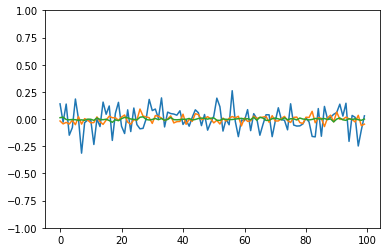

In [0]:
N = 100

while N < 100000:
    samples = np.zeros(100)

    for s in range(len(samples)):
        samples[s] = sum(np.random.normal(size=N))/N
    
    plt.plot(samples)
    N = N*10
    
plt.ylim(-1, 1)
plt.show()

## Teorema Central del Límite

Supongamos que $X$ es una variable aleatoria de media $\mathbb{E}(X)=\mu$ y varianza $\mathbb{V}(X)=\sigma^2$. Existe una forma sencilla de *normalizar* $X$ para que tenga media $0$ y desviación típica $1$, a saber

$$
    X_0 = \frac{X - \mu}{\sigma}.
$$

En efecto, por las propiedades de media y varianza, se tiene

$$
    \mathbb{E}(X_0) = \frac{\mathbb{E}(X) - \mu}{\sigma} = 0.
$$

$$
    \mathbb{V}(X_0) = \frac{\mathbb{V}\left(X - \mu\right)}{\sigma^2} = \frac{\mathbb{V}\left(X\right) - \mathbb{V}\left(\mu\right)}{\sigma^2} = \frac{\sigma^2-0}{\sigma^2} = 1.
$$

Consideremos, en particular, $\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$ con $X_1, \ldots, X_n$ variables aleatorias independientes idénticamente distribuidas de media $\mu$ y varianza $\sigma^2$. Entonces, tenemos que $\mathbb{E}(\bar{X}) = \mu$ y $\mathbb{V}(\bar{X}) = \frac{\sigma^2}{n}$. De este modo, la variable aleatoria $\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$ está normalizada.

**Teorema Central del Límite.** Sean $X_1, \ldots, X_n$ variables aleatorias independientes idénticamente distribuidas de media $\mu$ y varianza $\sigma^2$. Entonces, tenemos que convergen en distribución

$$
\frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \stackrel{d}{\longrightarrow} N(0,1)
$$

**Observación.**
* La convergencia en distribución significa que
$$
    F_{\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}}(x) \to F_{N(0,1)}(x)
$$

para (casi) todo $x \in \mathbb{R}$.
* Este resultado da la interpretación de la distribución normal: es la distribución que tiene un fenómeno si es combinación de muchos factores independientes.

**Ejercicio.** Comprobar de forma empírica el Teorema Central del Límite para la distribución de Bernouilli y para la exponencial.

In [0]:
# COMPUTA LA DISTRIBUCIÓN EMPÍRICA DE LA
# VARIABLE ALEATORIA X
def compute_empirical_dist(X, step, n_samples = 1000):
    steps = np.arange(-3,3, step)
    values = np.zeros(len(steps) + 1)
    
    for k in range(n_samples):
        x = X()

        index = 0
        while index < len(steps) and x > steps[index]: 
            index = index + 1
        for k in range(index, len(steps) + 1):
            values[k] = values[k] + 1
    
    steps = np.hstack([[-3-step], steps])
    
    return steps, values/n_samples

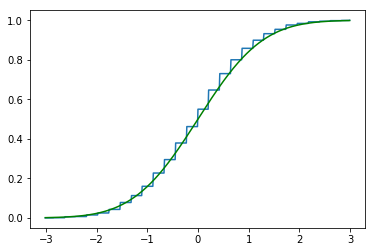

In [0]:
# MUESTREA UNA VARIABLE DE BERNOUILLI
# Y LA NORMALIZA
def benouilli_sampling_norm(p, n):
    X = 0.0
    for i in range(n):
        if random() < p:
            X = X + 1
    return (X/n - p)/(sqrt(p*(1-p)/n))

steps, emp_dist = compute_empirical_dist(lambda:benouilli_sampling_norm(0.3, 100), 0.01, n_samples = 1000)

plt.plot(steps, emp_dist)
plt.plot(steps, stats.norm.cdf(steps), 'g')
plt.show()

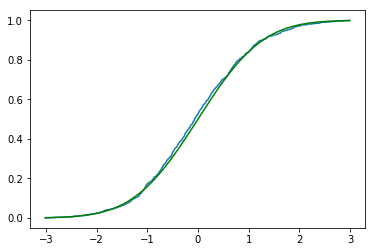

In [0]:
# MUESTREA UNA VARIABLE EXPONENCIAL
# Y LA NORMALIZA
def exponential_sampling_norm(l, n):
    X = sum(np.random.exponential(1/l, n))
    return (X/n - 1/l)/(sqrt(1/n)*1/l)

steps, emp_dist = compute_empirical_dist(lambda:exponential_sampling_norm(0.3, 100), 0.01, n_samples = 1000)

plt.plot(steps, emp_dist)
plt.plot(steps, stats.norm.cdf(steps), 'g')
plt.show()

# Estimador de máxima verosimilitud

Supongamos que estamos estudiando un cierto fenómeno que sabemos que se distribuye con una cierta distribución $\mathcal{D}(\theta)$ de probabilidad dependiente de un parámetro $\theta \in \mathbb{R}^n$, pero no conocemos el valor exacto de $\theta$. En esta sección buscaremos un estimador $\hat{\theta}$ para el parámetro $\theta$.

**Definición.** Sea $\mathcal{D}(\theta)$ una distribución discreta con función de masa $p_{\theta}(x)$. Sean $X_1, \ldots, X_n \sim \mathcal{D}(\theta)$ variables aleatorias independientes idénticamente distribuidas. Definimos la verosimilitud de $\theta$ como

$$
    \mathcal{L}(\theta) = \prod_{i=1}^n p_{\theta}(X_i).
$$

En ese caso, definimos el *estimador de máxima verosimilitud* (MLE estimator) como

$$
    \hat{\theta} = \underset{\theta}{\mathrm{argmax}}\, \mathcal{L}(\theta).
$$

**Observación.**
* Como $p_{\theta}(x) = \mathbb{P}_\theta(X = x)$, si evaluamos las variables aleatorias $X_1, \ldots, X_n$ y obtenemos valores $x_1, \ldots, x_n$, entonces

$$
    \mathcal{L}(\theta)(x_1, \ldots, x_n) = \prod_{i=1}^n p_{\theta}(x_i) = \prod_{i=1}^n \mathbb{P}_{\theta}(X_i = x_i) = \mathbb{P}_\theta\left(X_1 = x_1, \ldots, X_n = x_n\right)
$$

Es decir, $\mathcal{L}(\theta)(x_1, \ldots, x_n)$ mide la probabilidad de que, distribuyénose las $X_i$ como $\mathcal{D}(\theta)$, podamos obtener los valores $x_1, \ldots, x_n$. Esto justifica el nombre verosimilitud.
* Si $\mathcal{D}(\theta)$ es una distribución continua con función de densidad $f_{\theta}(x)$, definimos análogamente la verosimilitud como

$$
    \mathcal{L}(\theta) = \prod_{i=1}^n f_{\theta}(X_i).
$$

De igual forma, tomamos $\hat{\theta} = \mathrm{argmax}_\theta\, \mathcal{L}(\theta)$.

* En muchas ocasiones, la función de verosimilitud es difícil de manejar y optimizar. Por ello, se toma el logaritmo de $\mathcal{L}$, llamada la *función de log-similitud*

$$
    \mathcal{l}(\theta) = \log\left(\mathcal{L}(\theta)\right) = \sum_{i=1}^n \log\left(p_{\theta}(X_i)\right).
$$

Como el logaritmo es una función estrictamente creciente, tenemos que $\mathrm{argmax}_\theta\, \mathcal{l}(\theta) = \mathrm{argmax}_\theta\, \mathcal{L}(\theta) = \hat{\theta}$, por lo que $\mathcal{l}$ también puede usarse para calcular el estimador.

* En contextos de estadística bayesiana, se suele denotar

$$
    \mathbb{P}(X_1, \ldots, X_n\,|\,\theta) = \mathcal{L}(\theta) = \prod_{i=1}^n p(X_i\,|\,\theta).
$$

Esto es especialmente relevante si asumimos que $\theta$ en sí misma es una variable aleatoria con ciertas propiedades, llamada *distribución a priori*. Por ejemplo, se puede asumir que $\theta \sim N(\mu, \sigma)$ para ciertas $\mu, \sigma$ conocidas. Este conocimiento suele provenir de la naturaleza del problema estadístico a estudiar. Supongamos que $\theta$ es una variable discreta con función de masa $p(\theta)$ (análogamente, se puede suponer que es continua y usar la función de densidad). Entonces, podemos considerar la *verosimilitud a posteriori*

$$
    \mathbb{P}(\theta \,|\,X_1, \ldots, X_n) = \frac{\mathbb{P}(X_1, \ldots, X_n\,|\,\theta)\,p(\theta)}{\mathbb{P}(X_1, \ldots, X_n)} = \frac{\mathbb{P}(X_1, \ldots, X_n\,|\,\theta)\,p(\theta)}{\sum_{\theta} \mathbb{P}(X_1, \ldots, X_n\,|\, \theta)p(\theta)} 
$$

En ese caso, se toma el *estimador Bayes* como $\hat{\theta}_{BY} = \mathrm{argmax}_\theta\, \mathbb{P}(\theta \,|\,X_1, \ldots, X_n)$. En particular, como, la cantidad $\mathbb{P}(X_1, \ldots, X_n)$ es constante en $\theta$, se puede igualmente calcular como

$$
    \hat{\theta}_{BY} = \underset{\theta}{\mathrm{argmax}}\, \mathbb{P}(X_1, \ldots, X_n\,|\,\theta)\,p(\theta).
$$

**Ejercicio.** Calcular el estimador de máxima verosimilitud para el parámetro $p$ en la distribución de Bernouilli.

*Solución.* Supongamos que, al evaluar $X_1, \ldots, X_n$, se obtienen $e$ éxito (y, por tanto $n-e$ fracasos). Entonces la verosimilitud es

$$
    \mathcal{L}(p) = \prod_{i=1}^n p_{p}(x_i) = p^{e}(1-p)^{n-e}.
$$

De este modo, la log-verosimilitud es

$$
    \mathcal{l}(p) = e \log(p) + (n-e)\log(1-p) \Rightarrow \mathcal{l}'(p) = \frac{e}{p} - \frac{n-e}{1-p} = \frac{e - pn}{p(1-p)}
$$

Así, el máximo se alcanza en cuando $\mathcal{l}'(p)=0 \Leftrightarrow e - pn = 0 \Leftrightarrow p = e/n$. De este modo, $\hat{p} = \frac{e}{n}$. ¡Otro argumento más a favor de la regla de Laplace!

**Ejercicio.** Calcular el estimador de máxima verosimilitud para el parámetro $\mu$ en la distribución normal de desviación típica conocida.

*Solución.* Si al evaluar $X_1, \ldots, X_n \sim N(\mu, \sigma)$ obtenemos valores $x_1, \ldots, x_n$, la log-verosimilitud es

$$
    \mathcal{l}(\mu) = \sum_{i=1}^n \log\left(\frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-(x_i-\mu)^2}{2\sigma^2}}\right) = \sum_{i=1}^n \log\left(\frac{1}{\sigma \sqrt{2 \pi}}\right)  + \sum_{i=1}^n\log\left(e^{\frac{-(x_i-\mu)^2}{2\sigma^2}}\right) = -n\log\left(\sigma \sqrt{2 \pi}\right)  - \sum_{i=1}^n {\frac{(x_i-\mu)^2}{2\sigma^2}}
$$

De este modo, tenemos que $\mathcal{l}'(\mu) =  \sum_i {\frac{x_i-\mu}{\sigma^2}} = \frac{n\bar{x} - n\mu}{\sigma^2}$. Así $\mathcal{l}'(\mu) = 0 \Leftrightarrow n\bar{x} - n\mu = 0 \Leftrightarrow \mu = \bar{x}$. De este modo, el estimador de máxima verosimilitud es $\hat{\mu} = \bar{x}$.

In [0]:
n = 100000
mu = 0.6
sigma = 1.3

# CALCULAMOS EL MLE
X = np.random.normal(loc = mu, scale = sigma, size = n)

mu_hat = sum(X)/n
print(mu_hat)

0.610498184907


**Ejercicio.** Calcular el estimador de máxima verosimilitud para el parámetro $\sigma$ en la distribución normal de media conocida.

*Solución.* Análogamente al caso anterior, la log-verosimilitud es

$$
    \mathcal{l}(\sigma) = -n\log\left(\sigma \sqrt{2 \pi}\right)  - \sum_{i=1}^n {\frac{(x_i-\mu)^2}{2\sigma^2}}
$$

Sin embargo, al derivar, ahora obtenemos

$$
    \mathcal{l}'(\sigma) = - \frac{n}{\sigma}  + \sum_{i=1}^n {\frac{(x_i-\mu)^2}{\sigma^3}} = 0 \Leftrightarrow  \sum_{i=1}^n {\frac{(x_i-\mu)^2}{\sigma^3}} =  \frac{n}{\sigma} \Leftrightarrow \sigma^2 = \frac{1}{n}\sum_{i=1}^n (x_i-\mu)^2.
$$

De este modo, el estimador es $\hat{\sigma} = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i-\mu)^2}$.

In [0]:
n = 100000
mu = 0.6
sigma = 1.3

# CALCULAMOS EL MLE
X = np.random.normal(loc = mu, scale = sigma, size = n)

sigma_hat = sqrt(sum([(x-mu)**2 for x in X])/n)
print(sigma_hat)

1.3012671437733727
